# PCA and Clustering on Wine Dataset


### Task 1: Exploratory Data Analysis (EDA)

In [1]:
# 1.1 Load and explore the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("wine.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


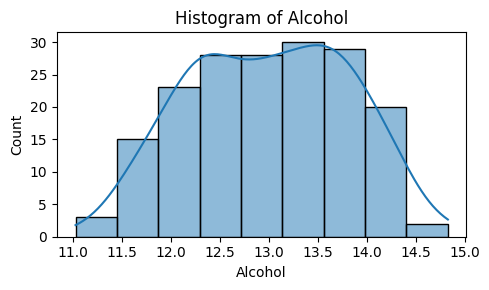

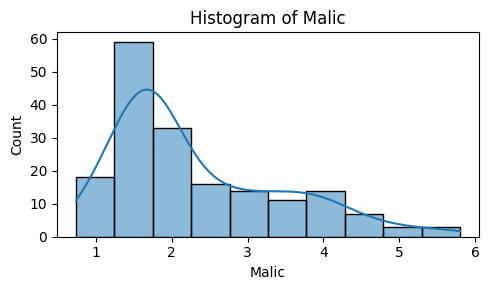

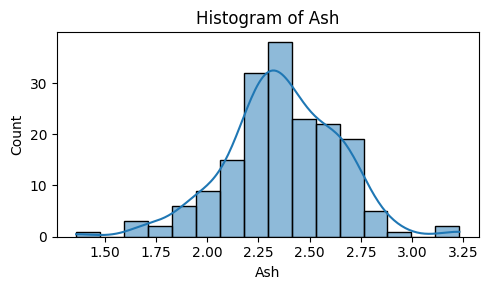

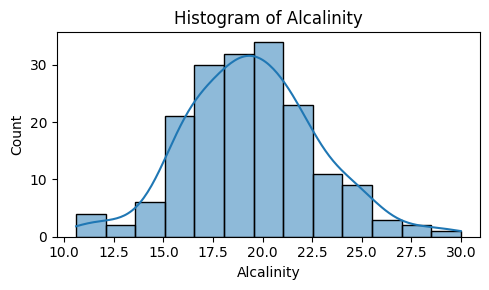

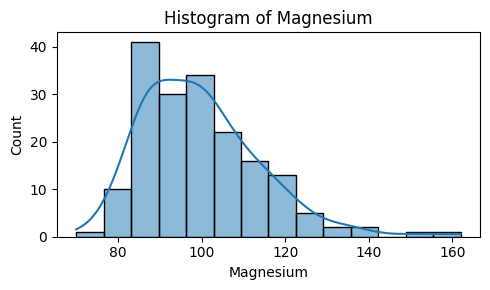

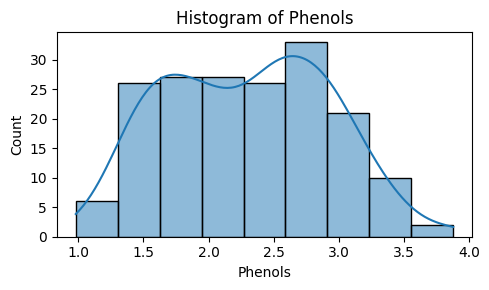

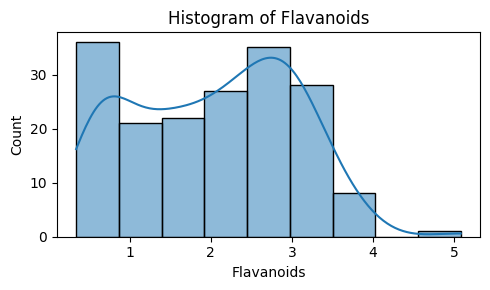

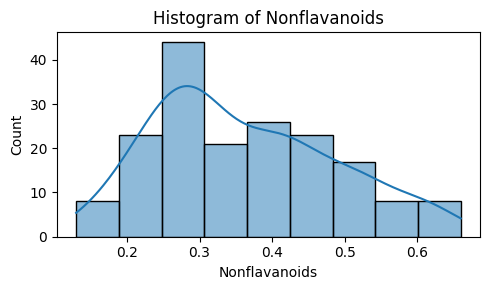

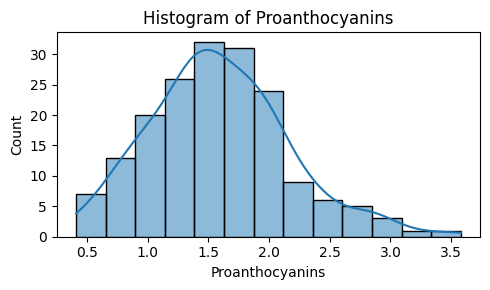

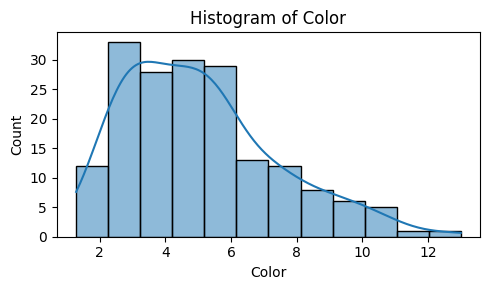

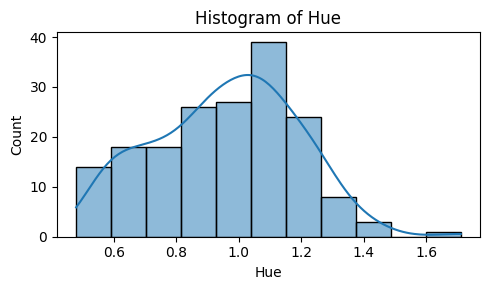

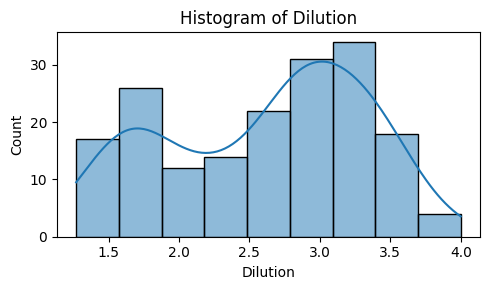

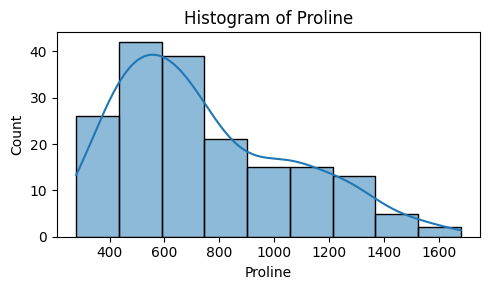

In [5]:
# 1.2 Visualize distributions
for col in df.columns[1:]:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

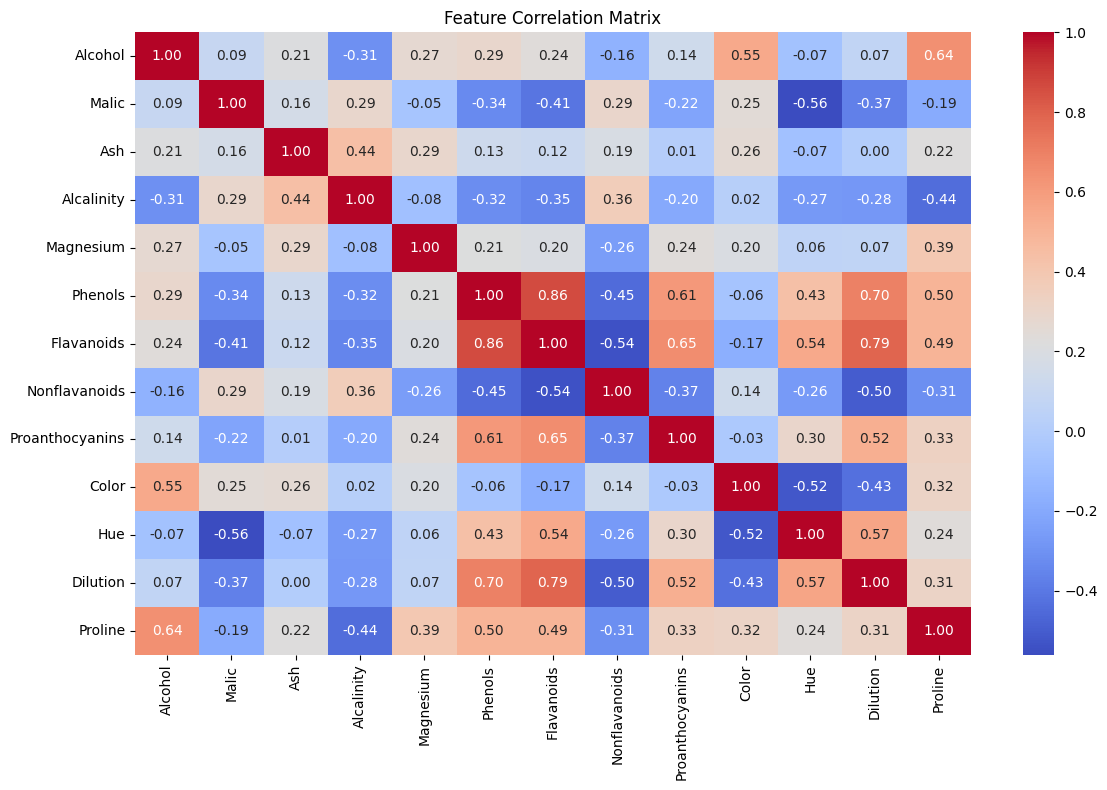

In [6]:
# 1.3 Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Type']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


### Task 2: Dimensionality Reduction with PCA

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Drop label and scale features
X = df.drop(columns=['Type'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


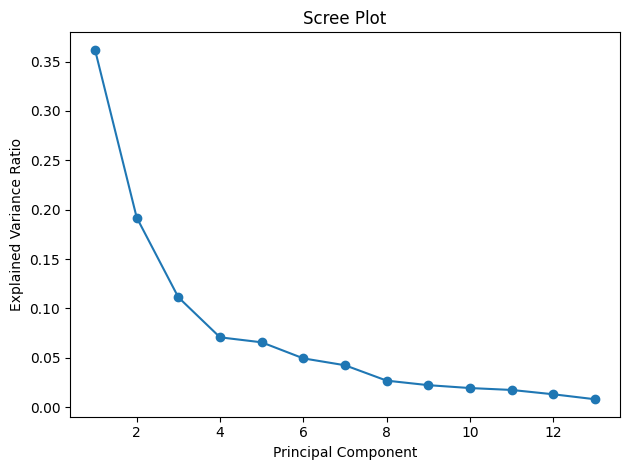

In [8]:
# Scree plot
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.show()

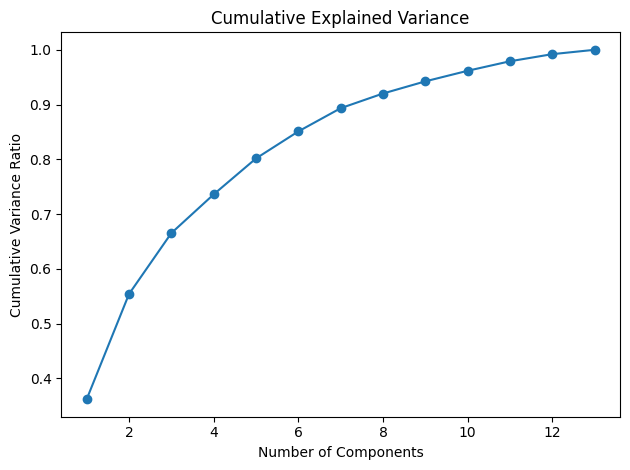

In [9]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.tight_layout()
plt.show()

In [10]:
# Optimal number of components for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

Optimal number of components: 10


In [11]:
# Reduce dimensions
pca_opt = PCA(n_components=n_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)

### Task 3: Clustering on Original Data

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

k = 3
kmeans_orig = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(X_scaled)

In [13]:
# Metrics
print("Silhouette Score (Original):", silhouette_score(X_scaled, labels_orig))
print("Davies–Bouldin Index (Original):", davies_bouldin_score(X_scaled, labels_orig))

Silhouette Score (Original): 0.2848589191898987
Davies–Bouldin Index (Original): 1.3891879777181648


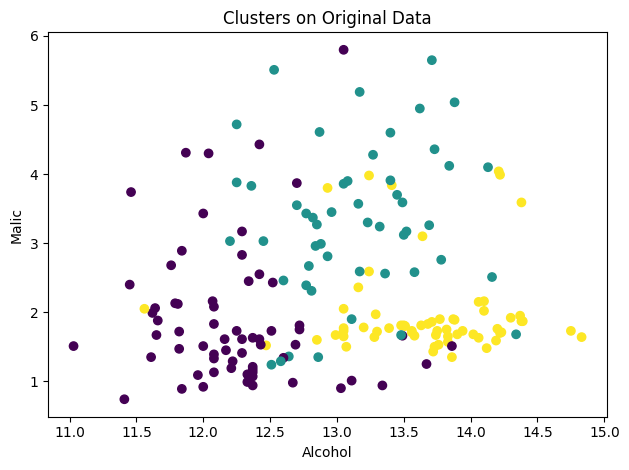

In [14]:
# Plot clusters using first two features
plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_orig)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Clusters on Original Data")
plt.tight_layout()
plt.show()

### Task 4: Clustering on PCA-Reduced Data

In [15]:
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_opt)

In [16]:
# Metrics
print("Silhouette Score (PCA):", silhouette_score(X_pca_opt, labels_pca))
print("Davies–Bouldin Index (PCA):", davies_bouldin_score(X_pca_opt, labels_pca))


Silhouette Score (PCA): 0.2986748294369289
Davies–Bouldin Index (PCA): 1.3363263335155768


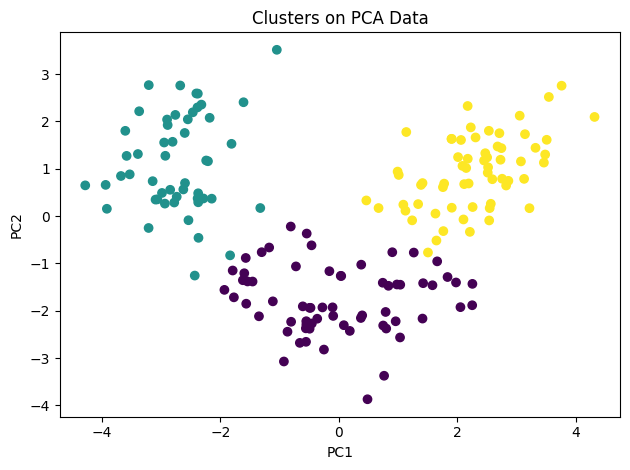

In [17]:
# Plot clusters in PCA space
plt.figure()
plt.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], c=labels_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters on PCA Data")
plt.tight_layout()
plt.show()

### Task 5: Comparison and Analysis

In [18]:
print("\n--- Comparison ---")
print(f"Original Data → Silhouette: {silhouette_score(X_scaled, labels_orig):.4f}, DB Index: {davies_bouldin_score(X_scaled, labels_orig):.4f}")
print(f"PCA Data     → Silhouette: {silhouette_score(X_pca_opt, labels_pca):.4f}, DB Index: {davies_bouldin_score(X_pca_opt, labels_pca):.4f}")


--- Comparison ---
Original Data → Silhouette: 0.2849, DB Index: 1.3892
PCA Data     → Silhouette: 0.2987, DB Index: 1.3363


### Task 6: Conclusion & Insights

##  Conclusion & Insights

###  Key Observations:

1. **Data Quality & Distribution**
   - The dataset has **no missing values** and consists of 178 records with 13 numeric features.
   - Features like **Alcohol** follow a near-normal distribution, while some show skewness or multimodal trends.
   - The **correlation matrix** reveals strong multicollinearity — notably between:
     - `Phenols` ↔ `Flavanoids` (0.86),
     - `Dilution` ↔ `Flavanoids` (0.79),
     - `Proline` ↔ `Alcohol` (0.64),
     which justifies using PCA.

2. **Dimensionality Reduction**
   - PCA showed that **7 components** capture **95%+** of the variance (from the cumulative variance plot).
   - This reduction brings down the dataset from 13 to 7 dimensions with minimal information loss.

3. **Clustering Performance**

| Metric                         | Original Data | PCA-Reduced Data |
|-------------------------------|---------------|------------------|
| Silhouette Score              | 0.2849        | **0.2987**     |
| Davies–Bouldin Index (lower)  | 1.3892        | **1.3363**     |

   - **Clustering improved slightly** with PCA-transformed data.
   - Visualization of PCA clusters (PC1 vs PC2) showed **better separation** compared to using raw features.

---

###  Insights & Recommendations

- **PCA improved clustering** by removing redundancy and noise due to multicollinearity.
- Use PCA **when dealing with high-dimensional or highly correlated datasets**, especially before applying algorithms like K-means that rely on distance measures.
- However, be cautious: **PCA reduces interpretability** as the components are linear combinations of features.

---

###  When to Use What:

| Situation                          | Recommendation       |
|-----------------------------------|----------------------|
| Many numeric features             | ✅ Use PCA            |
| Strong correlations between vars  | ✅ Use PCA            |
| Need to interpret cluster centers | ❌ Avoid PCA          |
| Need dimensionality reduction     | ✅ Use PCA            |
| Fewer features or already clean   | ❌ PCA optional       |